<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
!pip install seaborn==0.11.0

In [2]:
import pandas as pd

In [3]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


In [4]:
print(sns.__version__)

0.11.0


Load the dataset into a dataframe.


In [5]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [6]:
df.shape

(11398, 85)

In [7]:
duplicate = df[df.duplicated()]
len(duplicate)

0

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [8]:
df["ConvertedComp"].isna().sum()

816

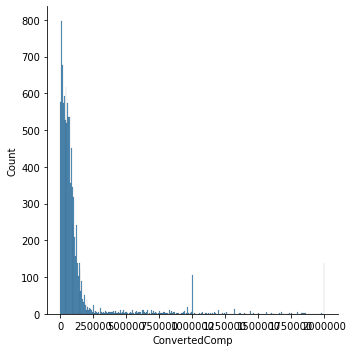

In [9]:
sns.displot (df["ConvertedComp"])

In [10]:
#sns.distplot (df["ConvertedComp"].dropna(), hist = False) -gives same result as above

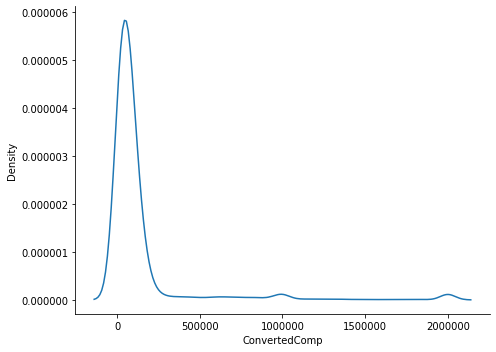

In [11]:
sns.displot(
  data=df,
  x="ConvertedComp",
  kind="kde",
  aspect=1.4,
)
#Aspect =the ratio of the width to the height; use with height in chart arguement to change the figure size at “figure-level” plots. 
#Use figure.figsize to change size of “axes-level”

Plot the histogram for the column `ConvertedComp`.


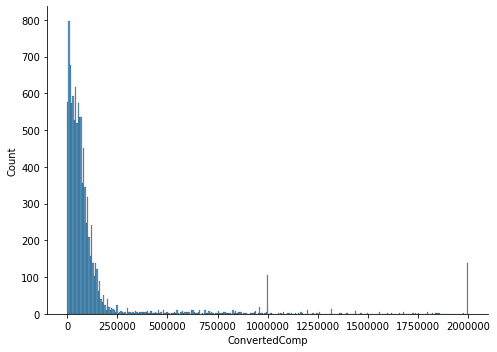

In [12]:
sns.displot(
  data=df,
  x="ConvertedComp",
  kind="hist",
  aspect=1.4
)

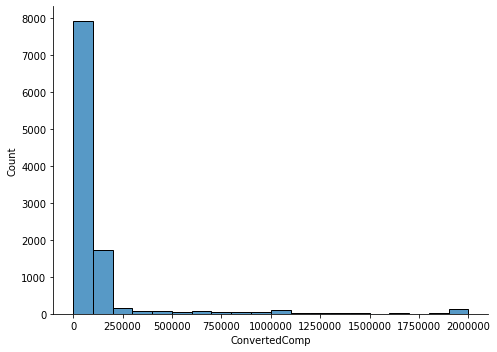

In [13]:
sns.displot(
  data=df,
  x="ConvertedComp",
  kind="hist",
  aspect=1.4,
    bins=20
)

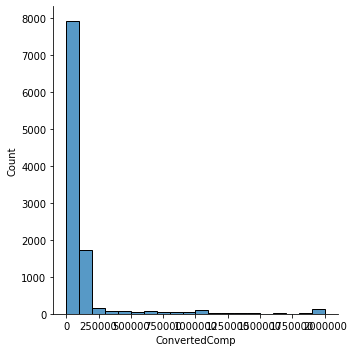

In [14]:
sns.displot(
  data=df,
  x="ConvertedComp",
  kind="hist",
    bins=20
)

What is the median of the column `ConvertedComp`?


In [15]:
 df["ConvertedComp"].median()

57745.0

How many responders identified themselves only as a **Man**?


In [16]:
df["Gender"].value_counts() # Count occurences of each category in column

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

In [17]:
df["Gender"].value_counts().Man # Count occurences of certain value; in this case "Man" in column "ConvertedComp"

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [18]:
 df.groupby(["Gender"], as_index=False)["ConvertedComp"].median()

,Gender,ConvertedComp
0,Man,57744.0
1,"Man;Non-binary, genderqueer, or gender non-con...",59520.0
2,"Non-binary, genderqueer, or gender non-conforming",67142.0
3,Woman,57708.0
4,Woman;Man,21648.0
5,"Woman;Man;Non-binary, genderqueer, or gender n...",30244.0
6,"Woman;Non-binary, genderqueer, or gender non-c...",65535.5


In [19]:
df.groupby(["Gender"], as_index=True)["ConvertedComp"].median()

Gender
Man                                                            57744.0
Man;Non-binary, genderqueer, or gender non-conforming          59520.0
Non-binary, genderqueer, or gender non-conforming              67142.0
Woman                                                          57708.0
Woman;Man                                                      21648.0
Woman;Man;Non-binary, genderqueer, or gender non-conforming    30244.0
Woman;Non-binary, genderqueer, or gender non-conforming        65535.5
Name: ConvertedComp, dtype: float64

In [20]:
df.groupby(["Gender"], as_index=True)["ConvertedComp"].median().Woman

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [21]:
from numpy import percentile
quartiles = percentile(df["Age"], [25, 50, 75])

print('Min: %.2f' % df["Age"].min())
print('Q1: %.2f' % quartiles[0])
print('Median: %.2f' % quartiles[1])
print('Q3: %.2f' % quartiles[2])
print('Max: %.2f' % df["Age"].max())

# Hmmm... looks like this method doesn't work
# %.2f= 2 decimal places

Min: 16.00
Q1: nan
Median: nan
Q3: nan
Max: 99.00


In [22]:
print('Min: %.2f' % df["Age"].min())
print('Q1: %.2f' % df['Age'].quantile(0.25))
print('Median: %.2f' % df['Age'].quantile(0.50))
print('Q3: %.2f' % df['Age'].quantile(0.75))
print('Max: %.2f' % df["Age"].max())

Min: 16.00
Q1: 25.00
Median: 29.00
Q3: 35.00
Max: 99.00


In [23]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


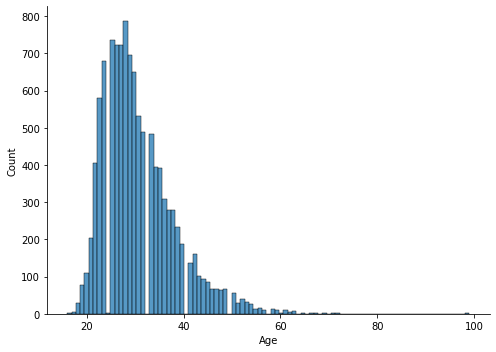

In [24]:
sns.displot(
  data=df,
  x="Age",
  kind="hist",
  aspect=1.4
)


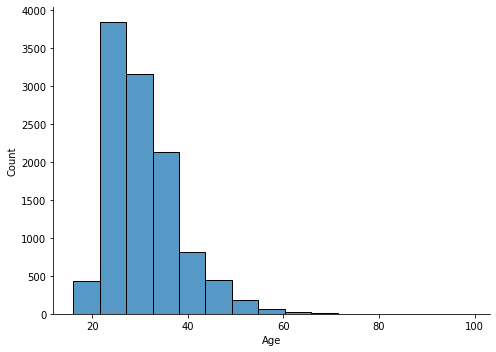

In [25]:
sns.displot(
  data=df,
  x="Age",
  kind="hist",
  aspect=1.4,
    bins=15
)

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


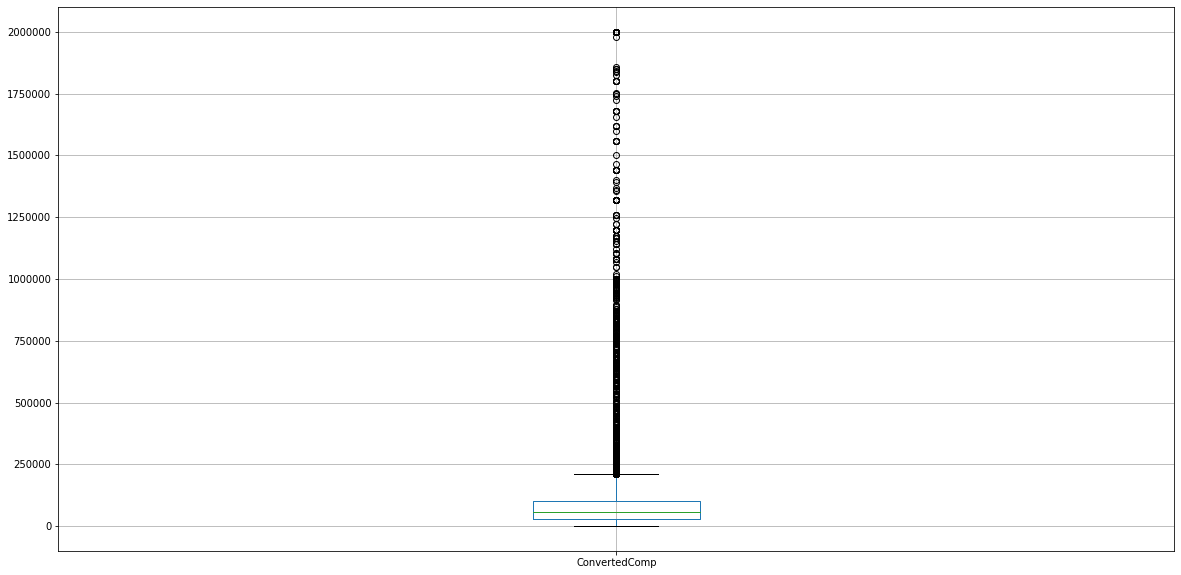

In [26]:
df.boxplot(column=['ConvertedComp'], return_type='axes', figsize=(20,10));

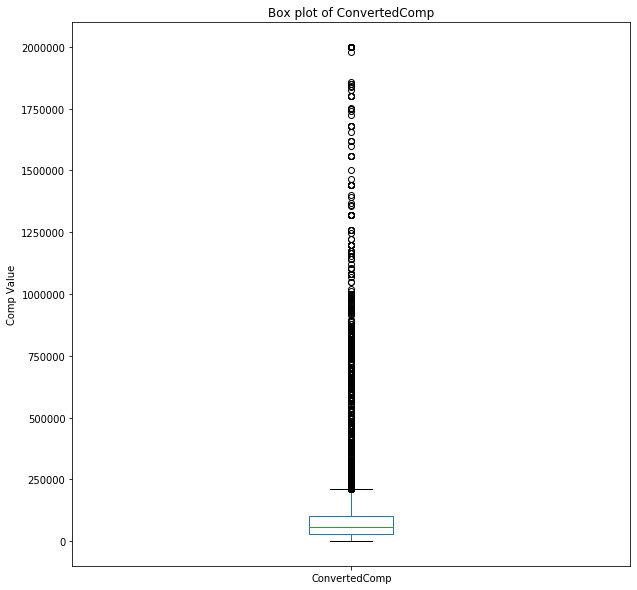

In [27]:
df['ConvertedComp'].plot(kind='box', figsize=(10,10))

plt.title('Box plot of ConvertedComp')
plt.ylabel('Comp Value')

plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [30]:
q3, q1 = np.percentile(df['ConvertedComp'], [75, 25])
iqr = q3 - q1
print("Inter Quartile Range: ", iqr)

# Hmmm... looks like this method doesn't work

Inter Quartile Range:  nan


In [31]:
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
iqr = q3 - q1
iqr

73132.0

Find out the upper and lower bounds.


In [32]:
upper_bound = df['ConvertedComp'].max()
lower_bound = df['ConvertedComp'].min()
print ("Upper bounds, ConvertedComp, is: ", upper_bound)
print ("Lower bounds, ConvertedComp, is: ", lower_bound)

Upper bounds, ConvertedComp, is:  2000000.0
Lower bounds, ConvertedComp, is:  0.0


Identify how many outliers are there in the `ConvertedComp` column.


In [33]:
outliers= ((df['ConvertedComp'] < (Q1 - 1.5 * IQR)) | (df['ConvertedComp'] > (Q3 + 1.5 * IQR))).sum()
print("Number of Outliers: ", outliers)

Number of Outliers:  879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [34]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out[col_name]

In [35]:
remove_outlier(df, 'ConvertedComp')

0         61000.0
1         95179.0
2         90000.0
4         65277.0
5         31140.0
           ...   
11392      9600.0
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
Name: ConvertedComp, Length: 9703, dtype: float64

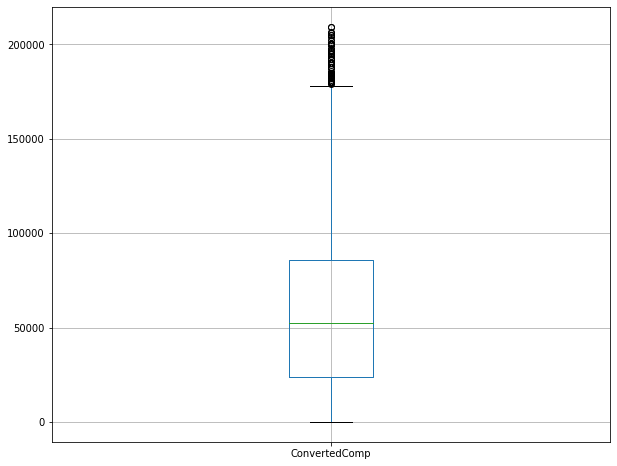

In [36]:
df_comp_no_outliers=remove_outlier(df, 'ConvertedComp').to_frame() #use '.to_frame()' to convert series to dataframe
df_comp_no_outliers.boxplot(column=['ConvertedComp'], return_type='axes', figsize=(10,8));

In [37]:
df_comp_no_outliers.mean()

ConvertedComp    59883.208389
dtype: float64

In [38]:
df_comp_no_outliers.median()

ConvertedComp    52704.0
dtype: float64

In [39]:
df['ConvertedComp'].mean()

131596.7316197316

In [40]:
"""
to_remove= = (df['ConvertedComp'] < (Q1 - 1.5 * IQR)) | (df['ConvertedComp'] > (Q3 + 1.5 * IQR))
df[to_remove=] = np.nan
df['ConvertedComp'].mean()

This method does not create a new dataframe  
"""

"\nto_remove= = (df['ConvertedComp'] < (Q1 - 1.5 * IQR)) | (df['ConvertedComp'] > (Q3 + 1.5 * IQR))\ndf[to_remove=] = np.nan\ndf['ConvertedComp'].mean()\n\nThis method does not create a new dataframe  \n"

In [41]:
q1 = df[["ConvertedComp", "Age"]].quantile(0.25)
q1

ConvertedComp    26868.0
Age                 25.0
Name: 0.25, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [45]:
df.corr()


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
